# 02 Exploratory Data Analysis

**Assignment 1: Exploratory analysis with statistical rigor and business implications**

- Rating distributions and satisfaction drivers
- Time trends
- Key insights for hotel managers

In [2]:
import sys
from pathlib import Path
project_root = Path.cwd() if (Path.cwd() / "src").exists() else Path.cwd().parent
sys.path.insert(0, str(project_root))

from src.utils import get_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

engine = get_engine(sample=True)
sns.set_theme(style="whitegrid")

## 1. Rating distributions

In [3]:
df = pd.read_sql(
    "SELECT rating_overall, rating_service, rating_cleanliness, rating_value, "
    "rating_location, rating_sleep_quality, rating_rooms FROM reviews",
    engine,
)
df.describe()

,rating_overall,rating_service,rating_cleanliness,rating_value,rating_location,rating_sleep_quality,rating_rooms
count,5000.000000,4828.000000,4824.000000,4810.000000,4814.000000,4324.000000,4788.000000
mean,4.069400,4.189105,4.287106,4.023493,4.522642,4.161193,4.039056
std,1.071267,1.087278,1.000452,1.089501,0.780906,1.066454,1.060889
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000
50%,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


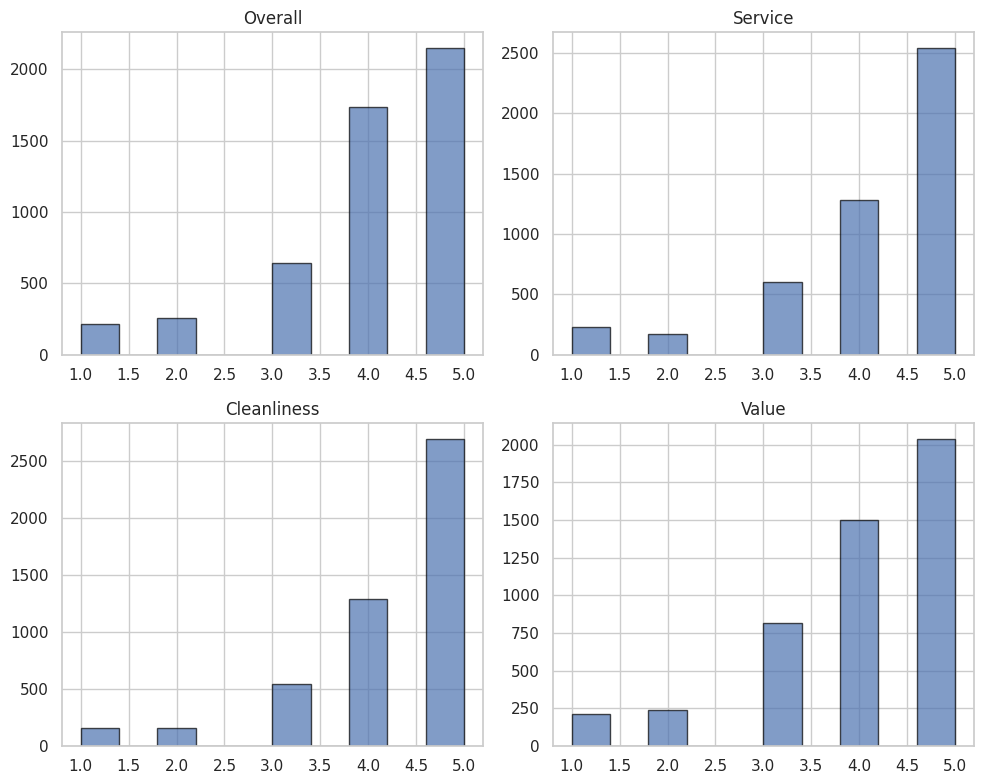

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for ax, col in zip(axes.flat, ["rating_overall", "rating_service", "rating_cleanliness", "rating_value"]):
    df[col].dropna().hist(ax=ax, bins=10, edgecolor="black", alpha=0.7)
    ax.set_title(col.replace("rating_", "").title())
plt.tight_layout()
plt.show()

## 2. Satisfaction drivers (aspect correlations with overall)

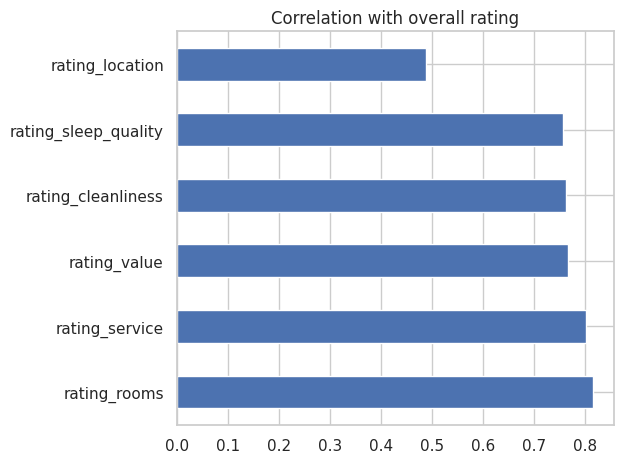

In [5]:
aspects = ["rating_service", "rating_cleanliness", "rating_value", "rating_location", "rating_sleep_quality", "rating_rooms"]
corr = df[["rating_overall"] + aspects].corr().iloc[0]
corr.drop("rating_overall").sort_values(ascending=False).plot(kind="barh", title="Correlation with overall rating")
plt.tight_layout()
plt.show()

## 3. Review volume by hotel

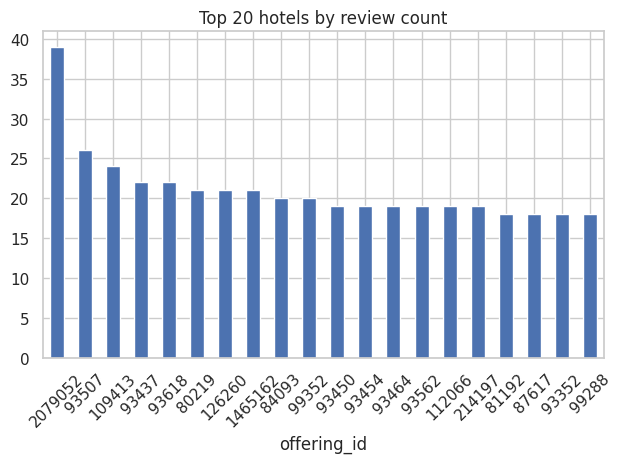

In [6]:
agg = pd.read_sql("""
SELECT offering_id, COUNT(*) AS n_reviews, AVG(rating_overall) AS avg_rating
FROM reviews GROUP BY offering_id ORDER BY n_reviews DESC LIMIT 20
""", engine)
agg.plot(x="offering_id", y="n_reviews", kind="bar", legend=False, title="Top 20 hotels by review count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Business implications (summary)

**Satisfaction drivers:** The correlation plot (Section 2) shows which aspects correlate most with overall rating; focus improvement on aspects that both correlate highly and have room to improve.

**Underperformers:** Hotels where an aspect (e.g. cleanliness) is well below their overall rating or peer median are candidates for targeted action (see benchmarking notebook for peer comparison).

**For the report:** Use the figures and stats above as evidence. State the top 2–3 drivers, typical rating distributions, and one concrete recommendation (e.g. "improve cleanliness where it lags overall").

In [7]:
# Key takeaways (for report)
aspects = ["rating_service", "rating_cleanliness", "rating_value", "rating_location", "rating_sleep_quality", "rating_rooms"]
corr_with_overall = df[["rating_overall"] + [c for c in aspects if c in df.columns]].corr().iloc[0].drop("rating_overall")
top_driver = corr_with_overall.idxmax()
print(f"Strongest driver of overall rating: {top_driver.replace('rating_', '')}")
print(f"Correlations with overall: {corr_with_overall.sort_values(ascending=False).to_dict()}")

Strongest driver of overall rating: rooms
Correlations with overall: {'rating_rooms': 0.8163351968030094, 'rating_service': 0.8012589765681026, 'rating_value': 0.767374820400277, 'rating_cleanliness': 0.7627785035443161, 'rating_sleep_quality': 0.7561220966044643, 'rating_location': 0.48931668721591265}
